In [2]:
#Setup
import datetime
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
folderwt=r'C:\Users\US Retail\Documents\camkpaper\may_figs\figs_paper\vium\vium_raw_data\WT'
foldertg=r'C:\Users\US Retail\Documents\camkpaper\may_figs\figs_paper\vium\vium_raw_data\cre'
foldersum=r'C:\Users\US Retail\Documents\camkpaper\may_figs\figs_paper\vium'
dfvium=pd.read_csv(os.path.join(foldersum,'vium_summary_datetimes.csv'))
dfvium.dropna(inplace=True,axis=1)
df_baseline=pd.DataFrame()#columns=['mse_id', 'Sex','GT','ZT','Speed'])
df_dosing=pd.DataFrame()#columns=['mse_id', 'Sex','GT','ZT','Cond','Speed'])
dfvium.ID=dfvium.apply(lambda row: row['ID']+row['Sex'],axis=1)
dfvium






,ID,Sex,GT,DOB,Start CNO,end CNO,Start SAL,end SAL,Start 24h bline,end 24h bline
0,1130-3F,F,WT,6/1/18,"9/17/2018, 11:00",16:00,"9/21/2018, 11:00",16:00,"9/15/2018, 6:00","9/16/2018, 6:00"
1,1128-16F,F,WT,4/12/18,"9/21/2018, 11:00",16:00,"9/17/2018, 11:00",16:00,"9/18/2018, 6:00","9/19/2018, 6:00"
2,1130-2F,F,TG,6/1/18,"9/17/2018, 11:00",16:00,"9/21/2018, 11:00",16:00,"9/16/2018, 6:00","9/17/2018,6:00"
3,1130-1M,M,TG,6/1/18,"9/21/2018, 11:00",16:00,"9/17/2018, 11:00",16:00,"9/20/2018, 6:00","9/21/2018, 6:00"
4,1128-15M,M,WT,4/12/18,"9/17/2018, 11:00",16:00,"9/21/2018, 11:00",16:00,"9/16/2018, 6:00","9/17/2018, 6:00"
5,1128-14M,M,TG,4/12/18,"9/21/2018, 11:00",16:00,"9/17/2018, 11:00",16:00,"9/15/2018, 6:00","9/16/2018, 6:00"
6,1132-13F,F,TG,7/10/18,"10/14/2018, 11:00",16:00,"10/17/2018, 11:00",16:00,"10/13/2018, 6:00","10/14/2018, 6:00"
7,1131-5F,F,WT,7/11/18,"10/17/2018, 11:00",16:00,"10/14/2018, 11:00",16:00,"10/16/2018, 6:00","10/17/2018, 6:00"
8,1132-9F,F,WT,7/10/18,"10/14/2018, 11:00",16:00,"10/17/2018, 11:00",16:00,"10/13/2018, 6:00","10/14/2018, 6:00"
9,1131-4M,M,TG,7/11/18,"10/17/2018, 11:00",16:00,"10/14/2018, 11:00",16:00,"10/13/2018, 6:00","10/14/2018, 6:00"


In [3]:
#Geenrate bline df
ztdosing=5
nhours=5#number of hours to measure dosing effect
#read WT
datafiles=os.listdir(folderwt)
datafiles=[fn for fn in datafiles if fn.endswith('motion.csv')]
for f in datafiles:
    df=pd.read_csv(os.path.join(folderwt,f))
    df['hour']=df.time.apply(lambda x: x.split(' ')[-1])
    df['date']=df.time.apply(lambda x: x.split(' ')[0])
    id=f.split('_')[-2]
    id='-'.join(id.split('-')[0:2])
    # if id[-1] not in '0123456789':
    #     id=id[:-1]
    df['mse_id']=id
    startbl = dfvium.loc[dfvium.ID==id,'Start 24h bline'].values[0].split(', ')
    list_date=startbl[0].split("/")
    if len (list_date[0])==1:
        list_date[0]='0'+list_date[0]
    #print('list date:',list_date)
    startbl[0] = list_date[-1]+'-'+list_date[0]+'-'+list_date[1] 
    startbl[1]='0'+startbl[1]+':00'
    endbl= startbl[0]
    endblp=endbl.split('-')
    endblp[2]=str(int(endblp[2])+1)
    for i,p in enumerate(endblp):
        if len(p)==1:
            endblp[i]='0'+p
            
    endbl=('-').join(endblp)
    indi=df.loc[(df.hour==startbl[1]) & (df.date==startbl[0])].index.values[0]
    indf=df.loc[(df.hour==startbl[1]) & (df.date==endbl)].index.values[0]
    auxdfb = df.iloc[indi:indf]
    auxdfb['GT']='WT'
    auxdfb = auxdfb.loc[:,['mse_id','GT','value','hour','date']]
    fh = int(auxdfb.hour.values[0].split(':')[0])
    auxdfb['ZT']=auxdfb.hour
    auxdfb['ZT']=auxdfb.hour.apply(lambda x: ':'.join([str(int(x.split(':')[0])-fh),x.split(':')[1],x.split(':')[2]]) if int(x.split(':')[0])>5 else\
        ':'.join([str(int(x.split(':')[0])+24-fh),x.split(':')[1],x.split(':')[2]]))
    auxdfb['ZT']=auxdfb.ZT.apply(lambda x: ':'.join([str(int(x.split(':')[0])-24),x.split(':')[1],x.split(':')[2]]) if int(x.split(':')[0])>23 else x)
    auxdfb['ZT']=auxdfb.ZT.apply(lambda x: '0'+x if len(x.split(':')[0])==1 else x)
    df_baseline=df_baseline.append(auxdfb,ignore_index=True)
    #read CNO dosing
    startcno = dfvium.loc[dfvium.ID==id,'Start CNO'].values[0].split(', ')
    list_date=startcno[0].split("/")
    for i,p in enumerate(list_date):
        if len(p)==1:
            list_date[i]='0'+p
    startcno[0] = list_date[-1]+'-'+list_date[0]+'-'+list_date[1] 
    startcno[1]=startcno[1]+':00'
    endcnoh= startcno[1]
    #Adding nhours
    endcnop=endcnoh.split(':')
    endcnop[0]=str(int(endcnop[0])+nhours)
    for i,p in enumerate(endcnop):
        if len(p)==1:
            endcnop[i]='0'+p
    endcno=(':').join(endcnop)
    #assuming start and end dosing times are on the same day
    indi=df.loc[(df.hour==startcno[1]) & (df.date==startcno[0])].index.values[0]
    indf=df.loc[(df.hour==endcno) & (df.date==startcno[0])].index.values[0]
    auxdf = df.iloc[indi:indf]
    auxdf['GT']='WT'
    auxdf['Cond']='CNO' 
    fh = int(auxdf.hour.values[0].split(':')[0])
    auxdf['ZT']=auxdf.hour.apply(lambda x: ':'.join([str(int(x.split(':')[0])-fh),x.split(':')[1],x.split(':')[2]]))
    auxdf = auxdf.loc[:,['mse_id','GT','value','ZT','hour','Cond','date']]
    df_dosing=df_dosing.append(auxdf,ignore_index=True)

    #read SAL dosing
    startsal = dfvium.loc[dfvium.ID==id,'Start SAL'].values[0].split(', ')
    list_date=startsal[0].split("/")
    for i,p in enumerate(list_date):
        if len(p)==1:
            list_date[i]='0'+p
    startsal[0] = list_date[-1]+'-'+list_date[0]+'-'+list_date[1] 
    startsal[1]=startsal[1]+':00'
    endsalh= startsal[1]
    #Adding nhours
    endsalp=endsalh.split(':')
    endsalp[0]=str(int(endsalp[0])+nhours)
    for i,p in enumerate(endsalp):
        if len(p)==1:
            endsalp[i]='0'+p
    endsal=(':').join(endsalp)
    #assuming start and end dosing times are on the same day, and dosing time has 2 digits
    indi=df.loc[(df.hour==startsal[1]) & (df.date==startsal[0])].index.values[0]
    indf=df.loc[(df.hour==endsal) & (df.date==startsal[0])].index.values[0]
    auxdf = df.iloc[indi:indf]
    auxdf['GT']='WT'
    auxdf['Cond']='SAL'
    fh = int(auxdf.hour.values[0][0:2])
    auxdf['ZT']=auxdf.hour.apply(lambda x: str(int(x[0:2])-fh+ztdosing)+x[2:])
    #auxdf['ZT']=auxdf.hour.apply(lambda x: str(int(x[0:2])-ztdosing)+x[2:])
    auxdf = auxdf.loc[:,['mse_id','GT','value','ZT','hour','Cond','date']]
    df_dosing=df_dosing.append(auxdf,ignore_index=True)





C:\Users\USRETA~1\AppData\Local\Temp/ipykernel_3448/3559396353.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  auxdfb['GT']='WT'
C:\Users\USRETA~1\AppData\Local\Temp/ipykernel_3448/3559396353.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  auxdf['GT']='WT'
C:\Users\USRETA~1\AppData\Local\Temp/ipykernel_3448/3559396353.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [4]:

#read TG
datafiles=os.listdir(foldertg)
datafiles=[fn for fn in datafiles if fn.endswith('motion.csv')]

for f in datafiles:
    df=pd.read_csv(os.path.join(foldertg,f))
    df['hour']=df.time.apply(lambda x: x.split(' ')[-1])
    df['date']=df.time.apply(lambda x: x.split(' ')[0])
    id=f.split('_')[-2]
    id='-'.join(id.split('-')[0:2])
    # if id[-1] not in '0123456789':
    #     id=id[:-1]
    df['mse_id']=id
    startbl = dfvium.loc[dfvium.ID==id,'Start 24h bline'].values[0].split(', ')
    list_date=startbl[0].split("/")
    if len (list_date[0])==1:
        list_date[0]='0'+list_date[0]
    # print('list date:',list_date)
    # print('startbl:',startbl)
    startbl[0] = list_date[-1]+'-'+list_date[0]+'-'+list_date[1] 
    startbl[1]='0'+startbl[1]+':00'
    endbl= startbl[0]
    endblp=endbl.split('-')
    endblp[2]=str(int(endblp[2])+1)
    for i,p in enumerate(endblp):
        if len(p)==1:
            endblp[i]='0'+p
            
    endbl=('-').join(endblp)
    indi=df.loc[(df.hour==startbl[1]) & (df.date==startbl[0])].index.values[0]
    indf=df.loc[(df.hour==startbl[1]) & (df.date==endbl)].index.values[0]
    auxdf = df.iloc[indi:indf]
    auxdf['GT']='TG'
    auxdfb = auxdf.loc[:,['mse_id','GT','value','hour','date']]
    fh = int(auxdfb.hour.values[0].split(':')[0])
    auxdfb['ZT']=auxdfb.hour
    auxdfb['ZT']=auxdfb.hour.apply(lambda x: ':'.join([str(int(x.split(':')[0])-fh),x.split(':')[1],x.split(':')[2]]) if int(x.split(':')[0])>5 else\
        ':'.join([str(int(x.split(':')[0])+24-fh),x.split(':')[1],x.split(':')[2]]))
    auxdfb['ZT']=auxdfb.ZT.apply(lambda x: ':'.join([str(int(x.split(':')[0])-24),x.split(':')[1],x.split(':')[2]]) if int(x.split(':')[0])>23 else x)
    auxdfb['ZT']=auxdfb.ZT.apply(lambda x: '0'+x if len(x.split(':')[0])==1 else x)
    df_baseline=df_baseline.append(auxdfb,ignore_index=True)
    #read CNO dosing
    startcno = dfvium.loc[dfvium.ID==id,'Start CNO'].values[0].split(', ')
    list_date=startcno[0].split("/")
    for i,p in enumerate(list_date):
        if len(p)==1:
            list_date[i]='0'+p
    startcno[0] = list_date[-1]+'-'+list_date[0]+'-'+list_date[1] 
    startcno[1]=startcno[1]+':00'
    endcnoh= startcno[1]
    #Adding nhours
    endcnop=endcnoh.split(':')
    endcnop[0]=str(int(endcnop[0])+nhours)
    for i,p in enumerate(endcnop):
        if len(p)==1:
            endcnop[i]='0'+p
    endcno=(':').join(endcnop)
    #assuming start and end dosing times are on the same day
    indi=df.loc[(df.hour==startcno[1]) & (df.date==startcno[0])].index.values[0]
    indf=df.loc[(df.hour==endcno) & (df.date==startcno[0])].index.values[0]
    auxdf = df.iloc[indi:indf]
    auxdf['GT']='TG'
    auxdf['Cond']='CNO'
    fh = int(auxdf.hour.values[0][0:2])
    auxdf['ZT']=auxdf.hour.apply(lambda x: str(int(x[0:2])-fh+ztdosing)+x[2:])
    #auxdf['ZT']=auxdf.hour.apply(lambda x: str(int(x[0:2])-ztdosing)+x[2:])
    auxdf = auxdf.loc[:,['mse_id','GT','value','ZT','Cond','date']]
    df_dosing=df_dosing.append(auxdf,ignore_index=True)

    #read SAL dosing
    startsal = dfvium.loc[dfvium.ID==id,'Start SAL'].values[0].split(', ')
    list_date=startsal[0].split("/")
    for i,p in enumerate(list_date):
        if len(p)==1:
            list_date[i]='0'+p
    startsal[0] = list_date[-1]+'-'+list_date[0]+'-'+list_date[1] 
    startsal[1]=startsal[1]+':00'
    endsalh= startsal[1]
    #Adding nhours
    endsalp=endsalh.split(':')
    endsalp[0]=str(int(endsalp[0])+nhours)
    for i,p in enumerate(endsalp):
        if len(p)==1:
            endsalp[i]='0'+p
    endsal=(':').join(endsalp)
    #assuming start and end dosing times are on the same day, and dosing time has 2 digits
    indi=df.loc[(df.hour==startsal[1]) & (df.date==startsal[0])].index.values[0]
    indf=df.loc[(df.hour==endsal) & (df.date==startsal[0])].index.values[0]
    auxdf = df.iloc[indi:indf]
    auxdf['GT']='TG'
    auxdf['Cond']='SAL'
    fh = int(auxdf.hour.values[0][0:2])
    auxdf['ZT']=auxdf.hour.apply(lambda x: str(int(x[0:2])-fh+ztdosing)+x[2:])
    #auxdf['ZT']=auxdf.hour.apply(lambda x: str(int(x[0:2])-ztdosing)+x[2:])
    auxdf = auxdf.loc[:,['mse_id','GT','value','ZT','Cond','date']]
    df_dosing=df_dosing.append(auxdf,ignore_index=True)

    
df_dosing


C:\Users\USRETA~1\AppData\Local\Temp/ipykernel_3448/2930455287.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  auxdf['GT']='TG'
C:\Users\USRETA~1\AppData\Local\Temp/ipykernel_3448/2930455287.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  auxdf['GT']='TG'
C:\Users\USRETA~1\AppData\Local\Temp/ipykernel_3448/2930455287.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

,mse_id,GT,value,ZT,hour,Cond,date
0,1128-15M,WT,4.750333,0:00:00,11:00:00,CNO,2018-09-17
1,1128-15M,WT,51.507892,0:10:00,11:10:00,CNO,2018-09-17
2,1128-15M,WT,57.704320,0:20:00,11:20:00,CNO,2018-09-17
3,1128-15M,WT,45.146380,0:30:00,11:30:00,CNO,2018-09-17
4,1128-15M,WT,37.317241,0:40:00,11:40:00,CNO,2018-09-17
...,...,...,...,...,...,...,...
1135,1132-15M,TG,1.600739,9:10:00,NaN,SAL,2018-11-12
1136,1132-15M,TG,2.039396,9:20:00,NaN,SAL,2018-11-12
1137,1132-15M,TG,2.152573,9:30:00,NaN,SAL,2018-11-12
1138,1132-15M,TG,1.545082,9:40:00,NaN,SAL,2018-11-12


In [5]:
df_baseline.head()

,mse_id,GT,value,hour,date,ZT
0,1128-15M,WT,160.678692,06:00:00,2018-09-16,00:00:00
1,1128-15M,WT,58.155128,06:10:00,2018-09-16,00:10:00
2,1128-15M,WT,15.553556,06:20:00,2018-09-16,00:20:00
3,1128-15M,WT,14.780930,06:30:00,2018-09-16,00:30:00
4,1128-15M,WT,8.467047,06:40:00,2018-09-16,00:40:00


In [6]:
df_baseline.tail()

,mse_id,GT,value,hour,date,ZT
2731,1132-15M,TG,28.499239,04:10:00,2018-11-08,23:10:00
2732,1132-15M,TG,41.572442,04:20:00,2018-11-08,23:20:00
2733,1132-15M,TG,15.888863,04:30:00,2018-11-08,23:30:00
2734,1132-15M,TG,13.478744,04:40:00,2018-11-08,23:40:00
2735,1132-15M,TG,2.483648,04:50:00,2018-11-08,23:50:00


('WT SAL', 'WT CNO', 'TG SAL', 'TG CNO') ['WT SAL' 'WT CNO' 'TG SAL' 'TG CNO']


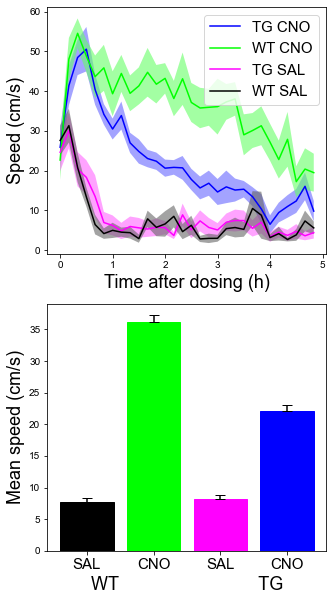

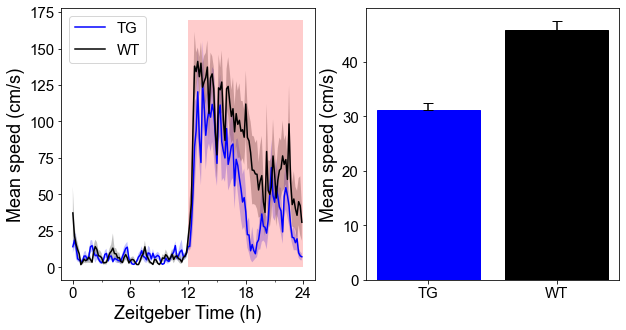

In [7]:
from scipy import stats
from matplotlib.patches import Rectangle

df_baseline['ZTh']=df_baseline.ZT.apply(lambda x: int(x[0:2])+int(x[3:5])/60)
#Plotting avergae
err=df_dosing.groupby(['GT','Cond']).sem().reset_index()
vals=df_dosing.groupby(['GT','Cond']).mean().reset_index()
x=vals.Cond.values[np.array([3,2,1,0])]
y=vals.value.values[np.array([3,2,1,0])]
ey=err.value.values[np.array([3,2,1,0])]
fig, [ax1,ax2]= plt.subplots(2, 1,figsize=(5,10))
plt.rcParams.update({'font.sans-serif':'Arial'})
plt.rcParams.update({'font.size':15})
# #plt.errorbar([0,1,2,3],vals,yerr=err)
error = [(0, 0, 0, 0), ey]
bp=ax2.bar([0, 1, 2, 3], y,yerr=error, align='center', alpha=1, ecolor='k', capsize=5)
ax2.set_xticks([0, 1, 2, 3], minor=False)
vals['name']=vals.apply(lambda row: row.GT+' '+row.Cond,axis=1)
colord={'TG CNO':(0,0,1),'WT CNO':(0,1,0),'TG SAL':(1,0,1),'WT SAL':(0,0,0)}
name2 = ['SAL','CNO','SAL','CNO']
name = vals.name.values[np.array([3,2,1,0])]
ax2.set_xticklabels(name2, fontsize=15)
ax2.set_xlabel('WT                            TG',fontsize=18)
ax2.set_ylabel('Mean speed (cm/s)', fontsize=18)
for i in range(4):
    bp[i].set_color(colord[name[i]])
#paired sample t-tet:
g1=df_dosing.loc[(df_dosing.GT=='TG') & (df_dosing.Cond=='SAL'),['mse_id','value']].\
    groupby('mse_id').mean().reset_index().value.values
g2=df_dosing.loc[(df_dosing.GT=='TG') & (df_dosing.Cond=='CNO'),['mse_id','value']].\
    groupby('mse_id').mean().reset_index().value.values
g3=df_dosing.loc[(df_dosing.GT=='WT') & (df_dosing.Cond=='SAL'),['mse_id','value']].\
    groupby('mse_id').mean().reset_index().value.values
g4=df_dosing.loc[(df_dosing.GT=='WT') & (df_dosing.Cond=='CNO'),['mse_id','value']].\
    groupby('mse_id').mean().reset_index().value.values

srtg=stats.ttest_rel(g1,g2)
srwt=stats.ttest_rel(g3,g4)
sr13=stats.ttest_ind(g1,g3)
sr14=stats.ttest_ind(g1,g4)
sr23=stats.ttest_ind(g2,g3)
sr24=stats.ttest_ind(g2,g4)

#unpaired t test
#stats.ttest_ind(df['bp_before'], df['bp_after'])
#Plotting time race
valst=df_dosing.groupby(['GT','Cond','ZT']).mean().reset_index()
valste=df_dosing.groupby(['GT','Cond','ZT']).sem().reset_index()
for c in valst.Cond.unique():
    for g in valst.GT.unique():
        tp=valst.loc[(valst.Cond==c)&(valst.GT==g)]
        vt = np.arange(len(tp))*10/60
        #plt.plot(vt,tp.value)
        vtp1=tp.value.values
        etp1 = valste.loc[(valst.Cond==c)&(valst.GT==g)].value.values
        c1=colord[g+' '+c]
        ax1.plot(vt, vtp1, color=c1,label=g+' '+c)
        ax1.fill_between(vt, vtp1 - etp1,
                            vtp1 + etp1, alpha=0.6, facecolor=(np.min([c1[0] + 0.4,1]), np.min([c1[1] + 0.4,1]),np.min([c1[2] + 0.4,1])))
ax1.legend()#tuple(name))#('SAL WT', 'CNO WT', 'SAL TG', 'CNO TG'))
ax1.set_xlabel('Time after dosing (h)',fontsize=18)
ax1.set_ylabel('Speed (cm/s)', fontsize=18)
plt.savefig('plot_dosing.pdf')  
print(tuple(name),name)
#Now plotting baseline for WT and Cre
#Plotting avergae
err=df_baseline.groupby(['GT']).sem().reset_index()
vals=df_baseline.groupby(['GT']).mean().reset_index()
#x=vals.Cond.values
y=vals.value.values
ey=err.value.values
fig, [ax1,ax2]= plt.subplots(1, 2,figsize=(10,5))
plt.rcParams.update({'font.sans-serif':'Arial'})
plt.rcParams.update({'font.size':15})
error = [(0, 0), ey]
bp=ax2.bar([0, 1], y,yerr=error, align='center', alpha=1, ecolor='k', capsize=5)
ax2.set_xticks([0, 1], minor=False)
vals['name']=vals.GT
colord={'TG':(0,0,1),'WT':(0,0,0)}
name = vals.name.values
ax2.set_xticklabels(name, fontsize=15)
ax2.set_ylabel('Mean speed (cm/s)', fontsize=18)
for i in range(2):
    bp[i].set_color(colord[name[i]])
#Plotting time trace
valst=df_baseline.groupby(['GT','ZTh']).mean().reset_index()
valste=df_baseline.groupby(['GT','ZTh']).sem().reset_index()
for g in valst.GT.unique():
        tp=valst.loc[valst.GT==g]
        #vt = np.arange(len(tp))*10/60
        #plt.plot(vt,tp.value)
        vtp1=tp.value.values
        vt=tp.ZTh.values
        etp1 = valste.loc[valst.GT==g].value.values
        c1=colord[g]
        ax1.plot(vt, vtp1, color=c1)
        ax1.fill_between(vt, vtp1 - etp1,
                            vtp1 + etp1, alpha=0.4, facecolor=(np.min([c1[0] + 0.4,1]), np.min([c1[1] + 0.4,1]),np.min([c1[2] + 0.4,1])))
ax1.legend(tuple(name))#('SAL WT', 'CNO WT', 'SAL TG', 'CNO TG'))
ax1.set_xticks([0, 6,12,18,24], minor=False)
ax1.set_xticks([3, 9,15,21], minor=True)
mmax=ax1.get_ylim()[1]
ax1.fill((12, 12,24,24), (0,mmax,mmax,0),'r',alpha=0.2)
#ax2.set_xticklabels(name, fontsize=14)
ax1.set_xlabel('Zeitgeber Time (h)',fontsize=18)
ax1.set_ylabel('Mean speed (cm/s)', fontsize=18)
plt.savefig('plot_bline.pdf') 
gbl = df_baseline.groupby(['mse_id','GT']).mean().reset_index()
blwt = gbl.loc[gbl.GT=='WT','value'].values
bltg = gbl.loc[gbl.GT=='TG','value'].values
srbl=stats.ttest_ind(blwt,bltg)


In [8]:
gdf=df_dosing.loc[(df_dosing.GT=='TG') & (df_dosing.Cond=='SAL'),['mse_id','value']]
gdf.groupby('mse_id').mean().reset_index().value.values

array([ 8.33881347, 11.3063765 ,  7.21041833,  5.89270522,  6.38954781,
        6.19744634,  7.97750114,  9.71592987,  7.75002598, 11.76134717])

In [9]:
df_baseline.to_csv('dfbaseline.csv')
df_dosing.to_csv('dfdosing.csv')

In [10]:
gbl = df_baseline.groupby(['mse_id','GT']).mean().reset_index()

In [11]:
df_dosing['idgt']=df_dosing.apply(lambda row: row.mse_id+'_'+row.GT, axis=1)
df_dosing.idgt.unique()

array(['1128-15M_WT', '1128-16F_WT', '1130-3F_WT', '1131-5F_WT',
       '1132-11F_WT', '1132-7M_WT', '1132-9F_WT', '1131-7M_WT',
       '1132-9M_WT', '1128-14M_TG', '1130-1M_TG', '1130-2F_TG',
       '1131-4M_TG', '1132-10F_TG', '1132-12M_TG', '1132-13F_TG',
       '1130-20F_TG', '1131-8F_TG', '1132-15M_TG'], dtype=object)

In [20]:
#Stats
print('TG sal vs cno:',srtg.statistic,srtg.pvalue/6)

print('WT sal vs cno:',srwt.statistic,srwt.pvalue/6)
print('TG sal vs WT sal:',sr13.statistic,sr13.pvalue/6)
print('TG sal vs WT cno:',sr14.statistic,sr14.pvalue/6)
print('TG cno vs wt sal:',sr23.statistic,sr23.pvalue/6)
print('TG cno vs WT cno:',sr24.statistic,sr24.pvalue/6)
print('Means')
print('TG sal:',np.mean(g1),'+-',np.std(g1)/np.sqrt(len(g1)),' N=',len(g1))
print('TG cno:',np.mean(g2),'+-',np.std(g2)/np.sqrt(len(g2)),' N=',len(g2))
print('TG CNO / TG sal:',np.mean(g2)/np.mean(g1))
print('WT CNO / WT sal:',np.mean(g4)/np.mean(g3))


print('WT sal:',np.mean(g3),'+-',np.std(g3)/np.sqrt(len(g3)),' N=',len(g3))
print('WT cno:',np.mean(g4),'+-',np.std(g4)/np.sqrt(len(g4)),' N=',len(g4))

print('\n',srbl.statistic,srbl.pvalue)
print('blwt:',np.mean(blwt),'+_',np.std(blwt)/np.sqrt(len(blwt)),' N=',len(blwt))
print('bltg:',np.mean(bltg),'+_',np.std(bltg)/np.sqrt(len(bltg)),' N=',len(bltg))
# 1 TG sal
# 2 TG cno
# 3 WT sal
# 4 WT cno


TG sal vs cno: -6.93438315750975 1.133589881475966e-05
WT sal vs cno: -7.930561959786948 7.748975301077361e-06
TG sal vs WT sal: 0.6214339074719639 0.09042638617251013
TG sal vs WT cno: -7.59723074504755 1.2201954293393496e-07
TG cno vs wt sal: 5.931066990822226 2.738512248218406e-06
TG cno vs WT cno: -3.2423869272871513 0.0007983012646200676
Means
TG sal: 8.254011183058108 +- 0.6201913485618219  N= 10
TG cno: 22.1666011439466 +- 2.130070649695314  N= 10
TG CNO / TG sal: 2.6855550171103455
WT CNO / WT sal: 4.697207926836056
WT sal: 7.701095200065582 +- 0.5587046250811517  N= 9
WT cno: 36.17364541906715 +- 3.5988334666413677  N= 9

 2.1418835256352704 0.046978124122570186
blwt: 45.86351267343478 +_ 4.371381116666229  N= 9
bltg: 31.1942223500223 +_ 4.721571886342079  N= 10


In [13]:
np.sqrt(16)

4.0

In [14]:
31.19422235002/45.863512673434

0.6801533622628289

In [15]:
#Analize 24 baseline sleep data
#For NREM REM and W plot:
#1- Power spectrum
#2- either delta, thetha or high theta average power
#3-6: % of time in state, Number bouts, Bout duration
import mat73
#Read data
folders=r'C:\Users\US Retail\Documents\camkpaper\may_figs\figs_paper\vium\blinestats'
fcre=os.listdir(os.path.join(folders,'cre'))
fwt=os.listdir(os.path.join(folders,'wt'))
data_dict=[]
for f in fcre:
    d=mat73.loadmat(os.path.join(folders,'cre',f))
    d['GT']='TG'
    data_dict.append(d)
for f in fwt:
    d=mat73.loadmat(os.path.join(folders,'wt',f))
    d['GT']='WT'
    data_dict.append(d)

datadf=pd.DataFrame(data_dict)
#N epochs and N bouts
datadf['nepsNR']=datadf.matpowerNR.apply(lambda x: x.shape[0])
datadf['nepsREM']=datadf.matpowerREM.apply(lambda x: x.shape[0])
datadf['nepsWA']=datadf.matpowerWA.apply(lambda x: x.shape[0])
datadf['nbtNR']=datadf.apply(lambda row: row.nepsNR//row.mboutnr,axis=1)
datadf['nbtREM']=datadf.apply(lambda row: row.nepsREM//row.mboutr,axis=1)
datadf['nbtWA']=datadf.apply(lambda row: row.nepsWA//row.mboutwa,axis=1)
#power comes for each epoch, need to average
datadf.matpowerNR=datadf.matpowerNR.apply(lambda x: x.mean(axis=0))*1E12/400#
2.5E6
datadf.matpowerREM=datadf.matpowerREM.apply(lambda x: x.mean(axis=0))*1E12/400#*2.5E6
datadf.matpowerWA=datadf.matpowerWA.apply(lambda x: x.mean(axis=0))*1E12/400#*2.5E6
#Multiplying by 4 s the bouts length (comes in epochs)
datadf.mboutnr*=4
datadf.mboutr*=4
datadf.mboutwa*=4
#datadf


In [16]:
#Make arrays for plots and stats
#power spectrum for nr, r and wa:
nrtg=np.stack(datadf.loc[datadf.GT=='TG','matpowerNR'].values)
nrwt=np.stack(datadf.loc[datadf.GT=='WT','matpowerNR'].values)
rtg=np.stack(datadf.loc[datadf.GT=='TG','matpowerREM'].values)
rwt=np.stack(datadf.loc[datadf.GT=='WT','matpowerREM'].values)
watg=np.stack(datadf.loc[datadf.GT=='TG','matpowerWA'].values)
wawt=np.stack(datadf.loc[datadf.GT=='WT','matpowerWA'].values)
frv=datadf.iloc[0]['freq'] #vector with frequency values
f1delta=0.4
f2delta=4
p1delta=np.where(frv<=f1delta)[0][-1]
p2delta=np.where(frv>f2delta)[0][0]
f1trem=4
f2trem=8
p1trem=np.where(frv<=f1trem)[0][-1]
p2trem=np.where(frv>f2trem)[0][0]
f1htw=8
f2htw=10
p1htw=np.where(frv<=f1htw)[0][-1]
p2htw=np.where(frv>f2htw)[0][0]
#Power in the bands
pnrdtg=nrtg[:,p1delta:p2delta].mean(axis=1)
pnrdwt=nrwt[:,p1delta:p2delta].mean(axis=1)
prttg=rtg[:,p1trem:p2trem].mean(axis=1)
prtwt=rwt[:,p1trem:p2trem].mean(axis=1)
phttg = watg[:,p1htw:p2htw].mean(axis=1)
phtwt = wawt[:,p1htw:p2htw].mean(axis=1)
#Dictionary with the plots: power vs frec, mean power in a band, % time, bout dur and Nbouts
plotdi={ 'W':{'power':[watg,wawt],'band':[phttg,phtwt],'pctime':[datadf.loc[datadf.GT=='TG','pwa'].values,
    datadf.loc[datadf.GT=='WT','pwa'].values],'bdur':[datadf.loc[datadf.GT=='TG','mboutwa'].values,datadf.loc[datadf.GT=='WT','mboutwa'].values],
    'nbouts':[datadf.loc[datadf.GT=='TG','nbtWA'].values,datadf.loc[datadf.GT=='WT','nbtWA'].values]},
    'NREM':{'power':[nrtg,nrwt],'band':[pnrdtg,pnrdwt],'pctime':[datadf.loc[datadf.GT=='TG','pnr'].values,
    datadf.loc[datadf.GT=='WT','pnr'].values],'bdur':[datadf.loc[datadf.GT=='TG','mboutnr'].values,datadf.loc[datadf.GT=='WT','mboutnr'].values],
    'nbouts':[datadf.loc[datadf.GT=='TG','nbtNR'].values,datadf.loc[datadf.GT=='WT','nbtNR'].values]},
    'REM':{'power':[rtg,rwt],'band':[prttg,prtwt],'pctime':[datadf.loc[datadf.GT=='TG','pr'].values,
    datadf.loc[datadf.GT=='WT','pr'].values],'bdur':[datadf.loc[datadf.GT=='TG','mboutr'].values,datadf.loc[datadf.GT=='WT','mboutr'].values],
    'nbouts':[datadf.loc[datadf.GT=='TG','nbtREM'].values,datadf.loc[datadf.GT=='WT','nbtREM'].values]}
   
    }



P val W band: 0.049322661152028345, T-stat.:-2.1168462510031447


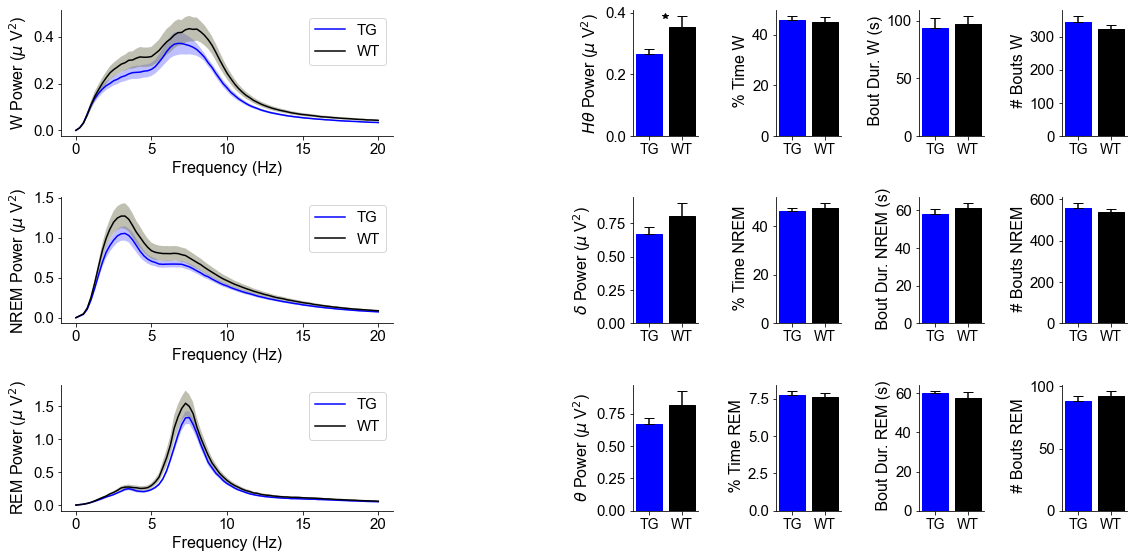

In [17]:

#Plotting
#NR
plt.figure(figsize=(16,8))
plt.rcParams.update({'font.sans-serif':'Arial'})
plt.rcParams.update({'font.size':15})
i=0
for st in ['W','NREM','REM']:
    i+=1
    plt.subplot(3,2,(2*i)-1)
    for ngt,gt in enumerate(['TG','WT']):
        vtp1=np.mean(plotdi[st]['power'][ngt],axis=0)
        vt=frv
        etp1 = np.std(plotdi[st]['power'][ngt],axis=0)/(plotdi[st]['power'][ngt].shape[0]**0.5)
        c1=colord[gt]
        plt.plot(vt, vtp1, color=c1,label=gt)
        plt.fill_between(vt, vtp1 - etp1,
                            vtp1 + etp1, alpha=0.5, facecolor=(np.min([c1[0] + 0.5,1]), np.min([c1[1] + 0.5,1]),np.min([c1[2] + 0.4,1])))
    plt.legend()
    plt.xlabel('Frequency (Hz)',fontsize=16)
    plt.ylabel(st+' Power ($\mu$ V$^2$)', fontsize=16)
    sns.despine()

#Bar plots
i=0
bandn=['$H\\theta$','$\delta$','$\\theta$']
for st in ['W','NREM','REM']:
    i+=1
    for k,feature in enumerate(list(plotdi[st].keys())[1:]):
        ax=plt.subplot(3,8,5+8*(i-1)+k)
        #power band
        ey=[np.std(plotdi[st][feature][0])/(len(plotdi[st][feature][0])**0.5),np.std(plotdi[st][feature][1])/(len(plotdi[st][feature][1])**0.5)]
        y=[np.mean(plotdi[st][feature][0]),np.mean(plotdi[st][feature][1])]

        error = [(0, 0), ey]
        bp=plt.bar([0, 1], y,yerr=error, align='center', alpha=1, ecolor='k', capsize=5)
        ax.set_xticks([0, 1], minor=False)
        vals['name']=vals.GT
        colord={'TG':(0,0,1),'WT':(0,0,0)}
        name = ['TG','WT']
        ax.set_xticklabels(name, fontsize=14)
        if k==0:
            ylb = bandn[i-1]+' Power ($\mu$ V$^2$)'
        if k==1:
            ylb = ' % Time '+st
        if k==2:
            ylb = ' Bout Dur. '+st+' (s)'
        if k==3:
            ylb = ' # Bouts '+ st
        for ki in range(2):
            bp[ki].set_color(colord[name[ki]])
        plt.ylabel(ylb,fontsize=16)
        
        sns.despine()
        #Unpaired T test:
        rest=stats.ttest_ind(plotdi[st][feature][0],plotdi[st][feature][1])
        sr13.statistic,sr13.pvalue
        if rest.pvalue<0.05:
            print(f"P val {st} {feature}: {rest.pvalue}, T-stat.:{rest.statistic}")
            plt.plot(0.5,np.max(y)+np.max(ey),'k*')
        
plt.tight_layout()
plt.savefig('bline_sleep_arch.pdf')  


In [18]:
plotdi['REM']['bdur'][1]

array([57.742574257425744, 77.5421686746988, 50.98412698412698,
       55.6271186440678, 51.29824561403509, 59.294117647058826,
       64.3298969072165, 49.77049180327869, 51.80952380952381],
      dtype=object)

In [19]:
for k,feature in enumerate(list(plotdi[st].keys())[1:]):
    print(k,feature)

0 band
1 pctime
2 bdur
3 nbouts
